<a href="https://www.kaggle.com/code/eavprog/abscur-bluefish-sharp-rub?scriptVersionId=163979369" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Настоящий файл устарел!!!

Новая версия находится по адресу https://www.kaggle.com/code/eavprog/abscur2

---

# Рейтинг голубых фишек Московской биржи по рублевым курсам и коэффициенту Шарпа

ДОБРО ПОЖАЛОВАТЬ НА СТРАНИЦУ РЕЙТИНГОВ ГОЛУБЫХ ФИШЕК МОСКОВСКОЙ БИРЖИ ПО РУБЛЕВЫМ КУРСАМ И КОЭФФИЦИЕНТУ ШАРПА

Мы приветствуем вас на странице рейтингов голубых фишек Московской биржи, где представлена информация о их рублевых курсах и коэффициентах Шарпа. Наша страница предоставляет вам уникальную возможность оценить доходность и риск данных финансовых инструментов с помощью систематического анализа на основе различных временных промежутков.

В списке голубых фишек Мосбиржи вы найдете всего 20 бумаг, которые представляют собой высоколиквидные и стабильные активы на рынке. Наша страница предлагает вам рейтинги для разных временных периодов, включая месяц, квартал, полгода, год, 2 года, 3 года и 5 лет. Это позволяет вам оценить доходность и устойчивость данных бумаг на разных временных горизонтах.

Основным инструментом анализа на нашей странице являются столбчатые диаграммы, отображающие рейтинги бумаг по коэффициенту Шарпа рублевого курса. Данные в диаграммах упорядочены по убыванию коэффициента Шарпа, что позволяет вам быстро определить самые перспективные бумаги в контексте доходности и риска. Коды бумаг представлены на горизонтальной оси диаграмм, что облегчает навигацию и сопоставление данных.

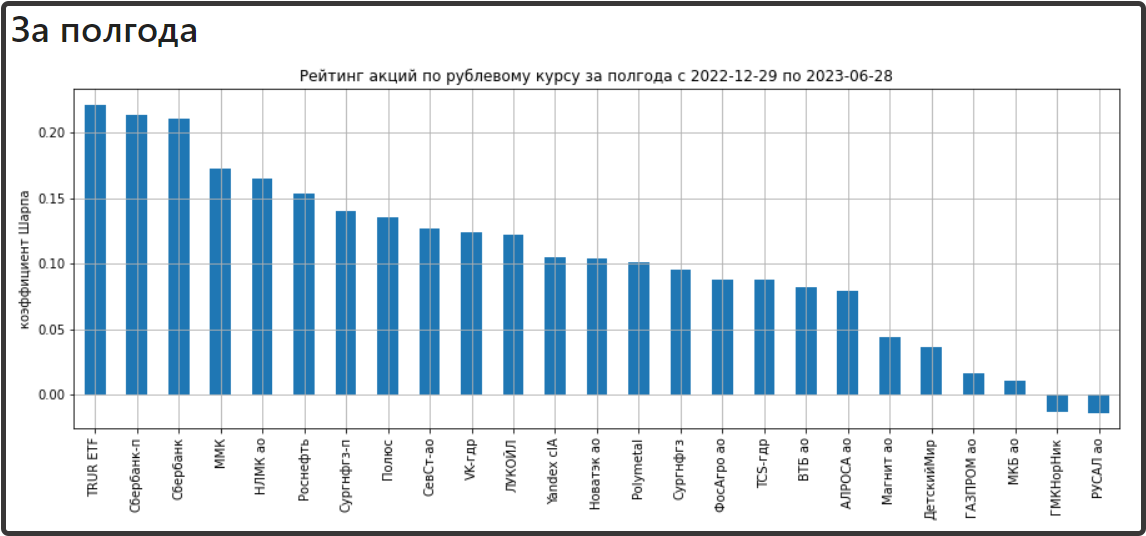

Коэффициент Шарпа считается как отношение средней дневной доходнсти к стандартному отклонению этой средней дневной доходности.

$$
coefSharp = \frac{mean(\frac{A_{i+1}-A_i}{A_i},i=start...end)}{std(\frac{A_{i+1}-A_i}{A_i},i=start...end)}
$$

Под диаграммами вы найдете подробную таблицу с информацией о самых выгодных и невыгодных бумагах, их категориях и соответствующих коэффициентах Шарпа. В таблице также предоставлены ссылки на страницы с графиками истории абсолютного и рублевого курса каждой бумаги, чтобы вы могли более детально изучить их доходность.

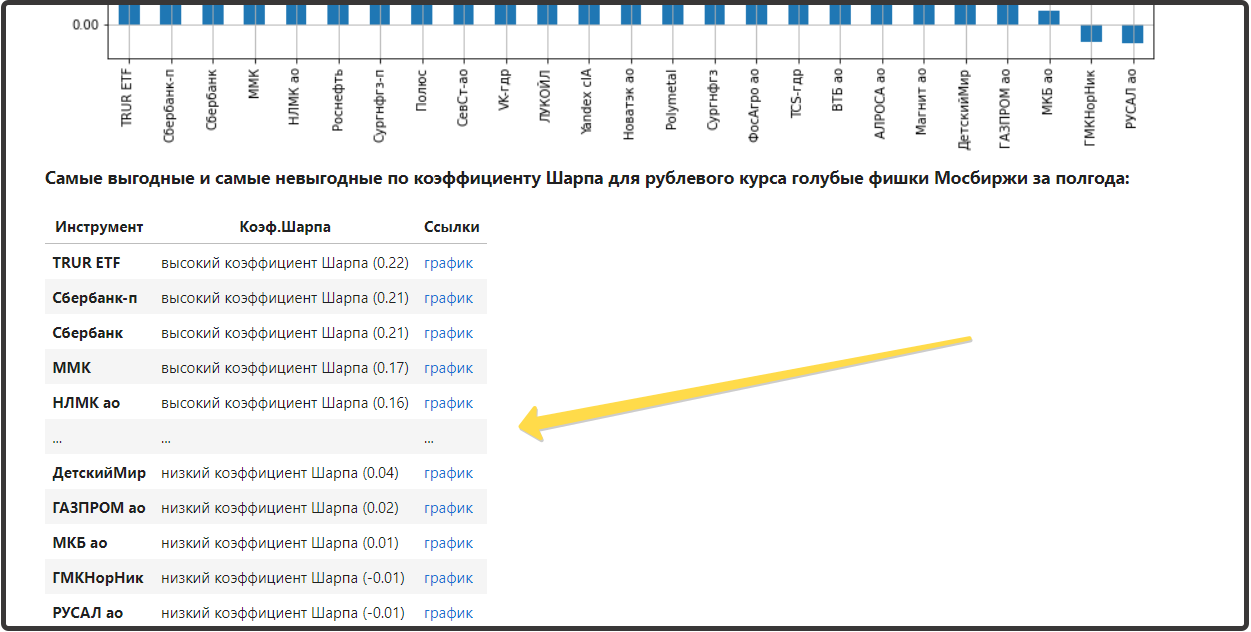

Для вашего удобства, под таблицей мы предлагаем ссылки на разделы проекта, соответствующие выбранным временным промежуткам. Таким образом, вы можете легко переходить между различными периодами и получать более полную картину рынка голубых фишек.

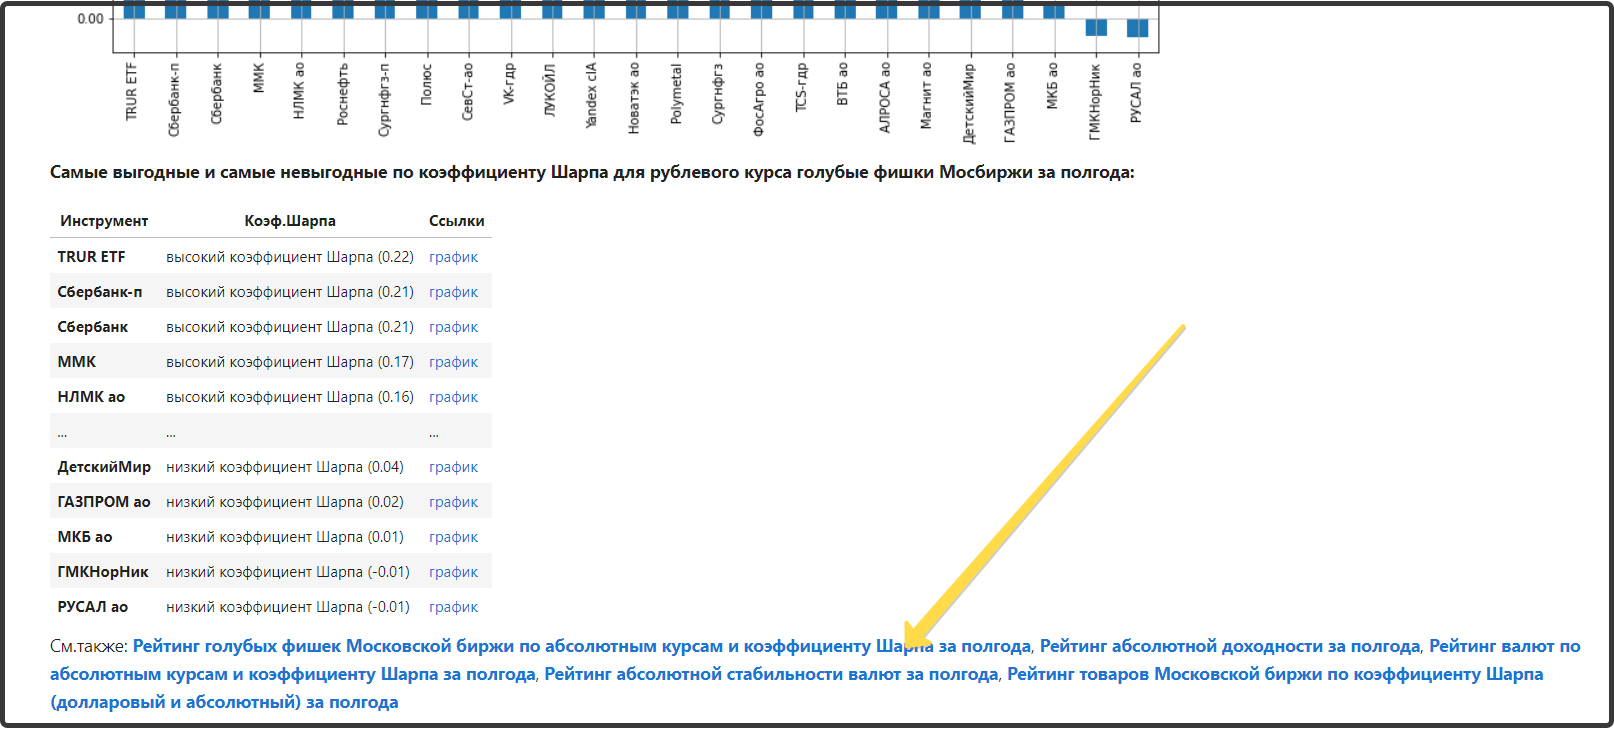

Для перемещения между бумагами вы можете воспользоваться правым боковым меню, которое обеспечивает интуитивно понятную навигацию и быстрый доступ к информации о каждой бумаге.

Мы надеемся, что наша страница с рейтингами голубых фишек Московской биржи по рублевым курсам и коэффициенту Шарпа станет незаменимым инструментом для ваших инвестиционных решений. Наша команда всегда стремится предоставить вам точные и актуальные данные, чтобы помочь вам принимать обоснованные финансовые решения.

Если у вас возникнут вопросы или предложения, пожалуйста, не стесняйтесь связаться с нами. Мы готовы помочь и принять во внимание вашу обратную связь.

In [ ]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from IPython.display import Markdown, display
import abscur_menu

# меню проекта печатаем
abscur_menu.print_menu()

# рублевые курсы акций подкачиваем
s_rub = pd.read_csv("/kaggle/input/mmvb-blue-fishki/close_table.csv",index_col=0,parse_dates=['Dates'])

def elem_quant_text(elems,elem,texts):
    
    _end = "(" + str(np.round(elem*100,2)) + "%)"
    q_cnt = len(texts)
    
    for n in range(q_cnt):
        if elem <= elems.quantile((n+1)/q_cnt):
            return texts[q_cnt-n-1] + " " + _end

diap = [[30,"месяц"],[92,"квартал"],[182,"полгода"],[365,"год"],[2*365,"2 года"],[3*365,"3 года"],[5*365,"5 лет"]]

for per,title_per in diap:
    display(Markdown("# За "+title_per))
    
    date_start = s_rub.asfreq(freq="D").index[-per]
    date_finish = s_rub.index[-1]
    
    sharp_texts = "высокий коэффициент Шарпа\tсредний коэффициент Шарпа\tнизкий коэффициент Шарпа".split("\t")
    res = (s_rub[s_rub.index >= date_start] / s_rub[s_rub.index >= date_start].median()).pct_change()
    res = res.mean()/res.std()
    res[np.isnan(res)] = 0
    
#     res = sharpe_ratio(s_rub[s_rub.index >= date_start].pct_change())
    res.sort_values(ascending=False,inplace=True)
    res.plot.bar(grid=True,title="Рейтинг акций по рублевому курсу за "+title_per+" c "+datetime.datetime.strftime(date_start,"%Y-%m-%d")+" по "+datetime.datetime.strftime(date_finish,"%Y-%m-%d"),ylabel="коэффициент Шарпа",legend=False,figsize=(15,5))
    plt.show()
    
    text = "**Самые выгодные и самые невыгодные по коэффициенту Шарпа для рублевого курса голубые фишки Мосбиржи за " + title_per + ":**\n\n"
    text += "|Инструмент|Коэф.Шарпа|Ссылки|\n"
    text += "|-|-|-|\n"
    for n in range(5):
        ticker = res.index[n]
        text += "|**" + ticker + "**|" + elem_quant_text(elems=res/100,elem=res[ticker]/100,texts=sharp_texts).replace('%','') + "|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#" + ticker.replace(" ","-") + ")|\n"
    text += "|...|...|...|\n"
    for n in range(len(res.index)-5,len(res.index)):
        ticker = res.index[n]
        text += "|**" + ticker + "**|" + elem_quant_text(elems=res/100,elem=res[ticker]/100,texts=sharp_texts).replace('%','') + "|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#" + ticker.replace(" ","-") + ")|\n"
    display(Markdown(text))
    
    text = "См.также: "
    text += "[**Рейтинг голубых фишек Московской биржи по абсолютным курсам и коэффициенту Шарпа за " + title_per + "**](https://www.kaggle.com/code/eavprog/abscur-bluefish-sharp/notebook#За-" + title_per.replace(" ","-") + ")"
    text += ", "
    text += "[**Рейтинг абсолютной доходности за " + title_per + "**](https://www.kaggle.com/code/eavprog/abscur-reyting-dohod/notebook#За-" + title_per.replace(" ","-") + ")"
    text += ", "
    text += "[**Рейтинг валют по абсолютным курсам и коэффициенту Шарпа за " + title_per + "**](https://www.kaggle.com/code/eavprog/abscur-sharp/notebook#За-" + title_per.replace(" ","-") + ")"
    text += ", "
    text += "[**Рейтинг абсолютной стабильности валют за " + title_per + "**](https://www.kaggle.com/code/eavprog/abscur-reit-stabil/notebook#За-" + title_per.replace(" ","-") + ")"
    text += ", "
    text += "[**Рейтинг товаров Московской биржи по коэффициенту Шарпа (долларовый и абсолютный) за " + title_per + "**](https://www.kaggle.com/code/eavprog/abscur-tovar-sharp/notebook#За-" + title_per.replace(" ","-") + ")"
    display(Markdown(text))